In [6]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)

data1 = pd.read_csv('../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data3 = pd.read_csv('../raw/서울시 신고_등록 체육시설 통계_2019.csv')

print(data1.columns)
print(data2.columns)
print(data3.dtypes)

Index(['자치구', '공원 수', '행정구역면적', '공원면적', '공원율', '1인당 공원 면적', '총 도시림 면적',
       '생활권 도시림 면적', '1인당 총 도시림 면적', '1인당 생활권 도시림 면적'],
      dtype='object')
Index(['지역', '연령별', '성별', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수'],
      dtype='object')
자치구          object
체육시설          int64
주민등록인구        int64
1인당 체육시설    float64
dtype: object


In [7]:
data2['연령별'].unique()

array(['계', '19~44', '45~64', '65~74', '75 이상'], dtype=object)

In [8]:
data2.rename(columns={'지역':'자치구'},inplace = True)
df = data2[data2['자치구'] != '서울시']
data4 = data3[data3['자치구'] != '서울시']
data4.set_index('자치구',inplace=True)
df = df[df['연령별'] == '계']
df = df[df['성별'] == '계']
df.set_index('자치구', inplace = True)
data1.set_index('자치구', inplace = True)
df1 = pd.concat([df,data1],axis=1)
df2 = pd.concat([df1,data4],axis=1)

In [9]:
df3 = df2.copy()[['공원 수','1인당 공원 면적','1인당 총 도시림 면적','1인당 생활권 도시림 면적','1인당 체육시설','주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수']]
df3.drop(['서울시'],inplace = True)
df3.reset_index(inplace = True)

<ipython-input-12-5c94c8e35cfd>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


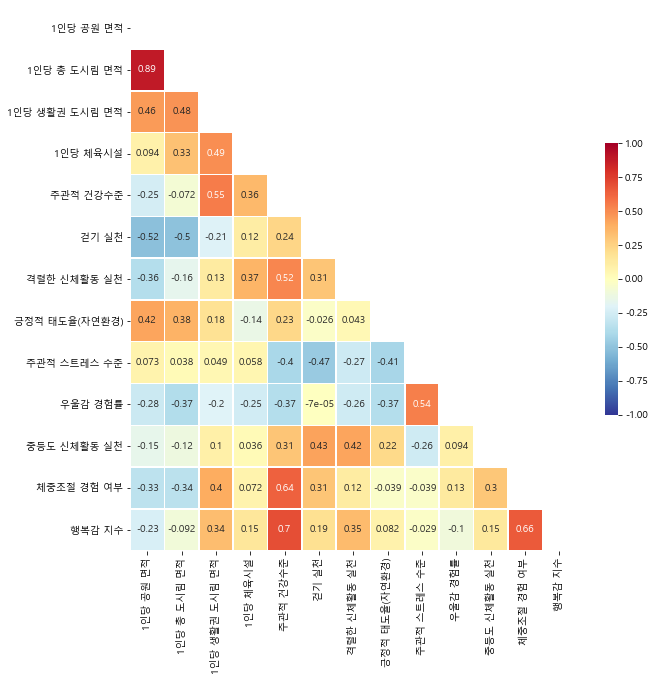

In [12]:
corr = df3.corr()
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()